In [1]:
# Import all required libraries 

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data file from local system

from google.colab import files 
uploaded = files.upload()   

Saving train_news.csv to train_news.csv


In [3]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['train_news.csv'])) 
print(df)

       Unnamed: 0  ...  label
0               0  ...      0
1               1  ...      0
2               2  ...      0
3               3  ...      0
4               4  ...      1
...           ...  ...    ...
20795       20795  ...      1
20796       20796  ...      1
20797       20797  ...      1
20798       20798  ...      0
20799       20799  ...      0

[20800 rows x 6 columns]


In [4]:
train_news = pd.read_csv('train_news.csv',encoding='latin-1')
train_news.head()

Unnamed: 0     id  ...                                               news label
0           0   9653  ...  WASHINGTON  â   In Sonny Perdueâs telling,...     0
1           1  10041  ...  HOUSTON  â   Venezuela had a plan. It was a ...     0
2           2  19113  ...  Sunday on ABCâs âThis Week,â while discu...     0
3           3   6868  ...  AUGUSTA, Me.  â   The beleaguered Republican...     0
4           4   7596  ...    Finian Cunningham has written extensively on...     1

[5 rows x 6 columns]

In [5]:
print ('Shape = >',train_news.shape)

Shape = > (20800, 6)


In [6]:
print ('fake and non_fake counts','\n',train_news.label.value_counts())

fake and non_fake counts 
 1    10413
0    10387
Name: label, dtype: int64


In [7]:
# Find Ratio for fake news
print ('fake ratio = ', round(len(train_news[train_news['label']==1]) / len(train_news.label),2)*100,'%')
print ('nonfake ratio  = ', round(len(train_news[train_news['label']==0]) / len(train_news.label),2)*100,'%')

fake ratio =  50.0 %
nonfake ratio  =  50.0 %


In [8]:
#New column for Length of message
train_news['length'] = train_news.news.str.len()
train_news.head(5)

Unnamed: 0     id  ... label  length
0           0   9653  ...     0  8064.0
1           1  10041  ...     0  6253.0
2           2  19113  ...     0   441.0
3           3   6868  ...     0  6662.0
4           4   7596  ...     1  9290.0

[5 rows x 7 columns]

Data Cleaning


In [43]:
def clean_data(dataframe):

    # Drop duplicate rows
    train_news.drop_duplicates(subset='news', inplace=True)
    
    # Remove punctation
    train_news['news'] = train_news['news'].str.replace('[^\w\s]',' ')

    # Remove numbers 
    train_news['news'] = train_news['news'].str.replace('[^A-Za-z]',' ')

    # Make sure any double-spaces are single 
    train_news['news'] = train_news['news'].str.replace('  ',' ')
    train_news['news'] = train_news['news'].str.replace('  ',' ')

    # Transform all text to lowercase
    train_news['news'] = train_news['news'].str.lower()
    
    print("New shape:", train_news.shape)
    return train_news.head()

In [44]:
# Call `clean_data(dataframe)` function
clean_data(train_news)

New shape: (17633, 8)


Unnamed: 0     id  ...  length clean_length
0           0   9653  ...  8064.0           82
1           1  10041  ...  6253.0           69
2           2  19113  ...   441.0           97
3           3   6868  ...  6662.0           96
4           4   7596  ...  9290.0           24

[5 rows x 8 columns]

In [45]:
# Remove punctuation
train_news['news'] = train_news['news'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_news['news'] = train_news['news'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_news['news'] = train_news['news'].str.replace(r'^\s+|\s+?$', '')

# Remove leading and trailing whitespace
train_news['news'] = train_news['news'].str.replace('NaN', 'novalue')

In [46]:
def clean_data(dataframe):

    # Drop duplicate rows
    train_news.drop_duplicates(subset='headline', inplace=True)
    
    # Remove punctation
    train_news['headline'] = train_news['headline'].str.replace('[^\w\s]',' ')

    # Remove numbers 
    train_news['headline'] = train_news['headline'].str.replace('[^A-Za-z]',' ')

    # Make sure any double-spaces are single 
    train_news['headline'] = train_news['headline'].str.replace('  ',' ')
    train_news['headline'] = train_news['headline'].str.replace('  ',' ')

    # Transform all text to lowercase
    train_news['headline'] = train_news['headline'].str.lower()
    
    print("New shape:", train_news.shape)
    return train_news.head()

In [47]:
# Remove punctuation
train_news['headline'] = train_news['headline'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_news['headline'] = train_news['headline'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_news['headline'] = train_news['headline'].str.replace(r'^\s+|\s+?$', '')

# Remove leading and trailing whitespace
train_news['headline'] = train_news['headline'].str.replace('NaN', 'novalue')

In [48]:
# Call `clean_data(dataframe)` function
clean_data(train_news)

New shape: (17464, 8)


Unnamed: 0     id  ...  length clean_length
0           0   9653  ...  8064.0           82
1           1  10041  ...  6253.0           69
2           2  19113  ...   441.0           97
3           3   6868  ...  6662.0           96
4           4   7596  ...  9290.0           24

[5 rows x 8 columns]

**Check Nulls**

In [49]:
# Create a DataFrame to check nulls

pd.DataFrame([train_news.isnull().sum()], index=["trainnews"]).T

trainnews
Unnamed: 0            0
id                    0
headline              0
written_by            0
news                  0
label                 0
length                0
clean_length          0

In [50]:
train_news.dropna(inplace=True)

In [52]:
print("New shape:", train_news.shape)

New shape: (17464, 8)


**Spam Detection for news headlines**

In [53]:
# Convert all messages to lower case
train_news['news'] = train_news['news'].str.lower()

In [54]:
train_news.head()

Unnamed: 0     id  ...  length clean_length
0           0   9653  ...  8064.0           82
1           1  10041  ...  6253.0           69
2           2  19113  ...   441.0           97
3           3   6868  ...  6662.0           96
4           4   7596  ...  9290.0           24

[5 rows x 8 columns]

In [55]:
!pip install nltk

In [56]:
import nltk

In [57]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train_news['news'] = train_news['news'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [59]:
# New column (clean_length) after puncuations,stopwords removal
train_news['clean_length'] = train_news.headline.str.len()
train_news.head()

Unnamed: 0     id  ...  length clean_length
0           0   9653  ...  8064.0           82
1           1  10041  ...  6253.0           69
2           2  19113  ...   441.0           95
3           3   6868  ...  6662.0           96
4           4   7596  ...  9290.0           23

[5 rows x 8 columns]

In [60]:
# Total length removal
print ('Origian Length', train_news.length.sum())
print ('Clean Length', train_news.clean_length.sum())

Origian Length 85695033.0
Clean Length 1261435


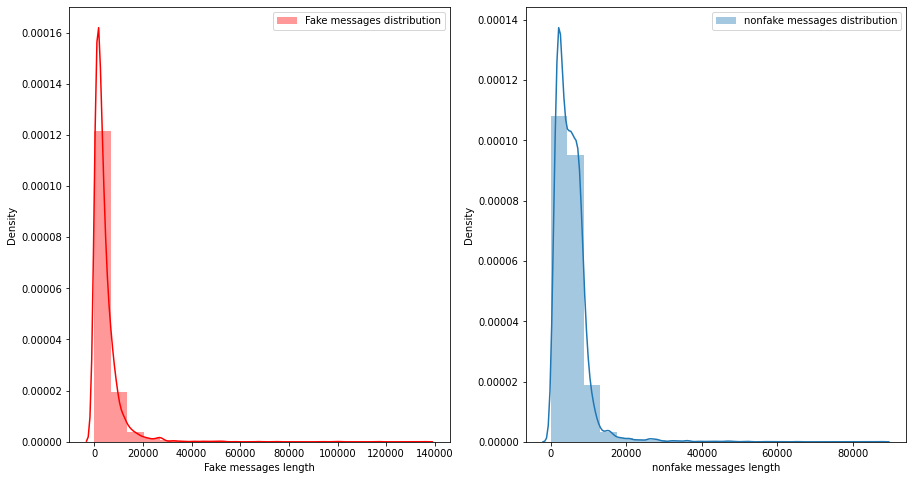

In [61]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train_news[train_news['label']==1]['length'],bins=20,ax=ax[0],label='Fake messages distribution',color='r')

ax[0].set_xlabel('Fake messages length')
ax[0].legend()

sns.distplot(train_news[train_news['label']==0]['length'],bins=20,ax=ax[1],label='nonfake messages distribution')
ax[1].set_xlabel('nonfake messages length')
ax[1].legend()

plt.show()

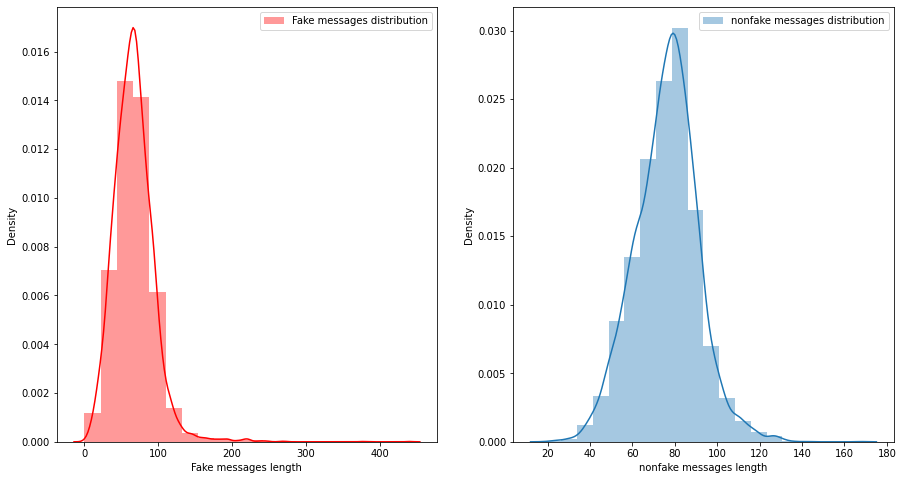

In [62]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train_news[train_news['label']==1]['clean_length'],bins=20,ax=ax[0],label='Fake messages distribution',color='r')
ax[0].set_xlabel('Fake messages length')
ax[0].legend()

sns.distplot(train_news[train_news['label']==0]['clean_length'],bins=20,ax=ax[1],label='nonfake messages distribution')
ax[1].set_xlabel('nonfake messages length')
ax[1].legend()

plt.show()

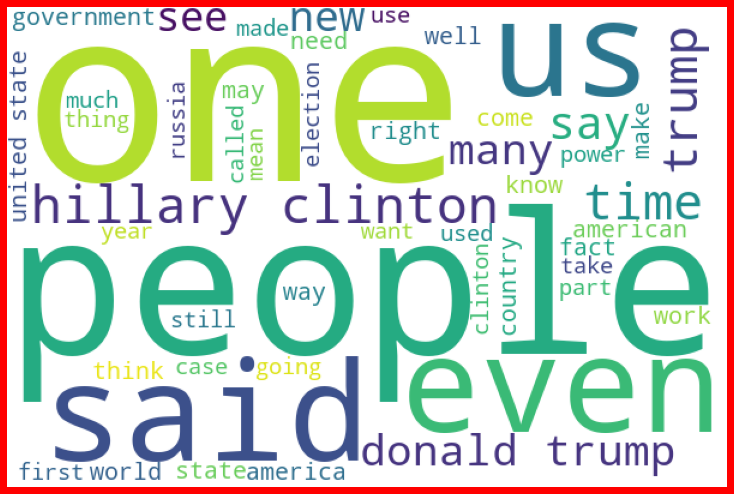

In [63]:
#Getting sense of loud words in fake news 
from wordcloud import WordCloud

fake = train_news['news'][train_news['label']==1]
fake_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(fake))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

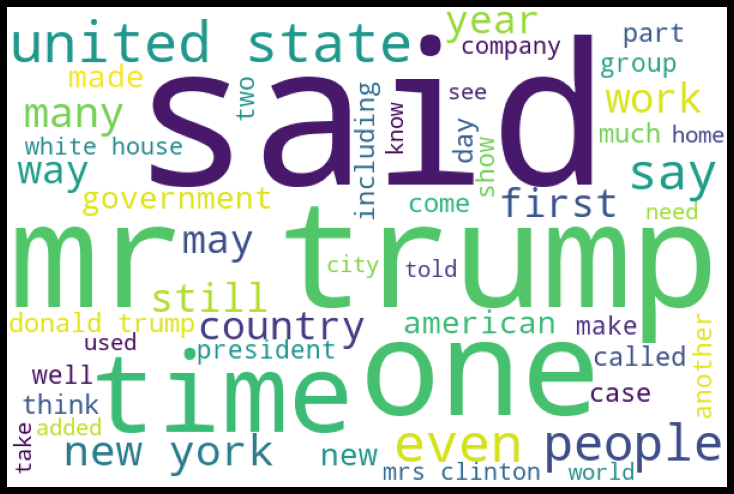

In [65]:
#Getting sense of loud words in non fake 

nonfake = train_news['news'][train_news['label']==0]
fake_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(nonfake))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [78]:
# Basic libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Natural Language Processing
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [66]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(train_news['news'])

X = features
y = train_news['label']

In [69]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.733623453962437


In [70]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      2621
           1       1.00      0.33      0.50      1745

    accuracy                           0.73      4366
   macro avg       0.84      0.67      0.66      4366
weighted avg       0.81      0.73      0.69      4366



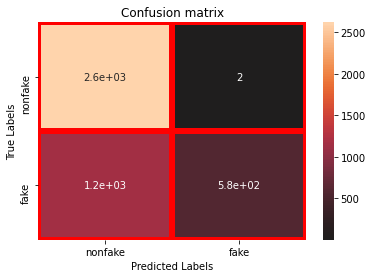

In [73]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['nonfake','fake'])
ax.yaxis.set_ticklabels(['nonfake','fake'])
plt.show()

In [74]:
conf_mat

array([[2619,    2],
       [1161,  584]])

In [ ]:
Fake news detection using column 'headline'

In [92]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features_1 = tf_vec.fit_transform(train_news['headline'])

X1 = features_1
y1 = train_news['label']

In [94]:
# Train and predict
X1_train,x1_test,Y1_train,y1_test = train_test_split(X1,y1,random_state=42)

naive.fit(X1_train,Y1_train)

y1_pred= naive.predict(x1_test)

print ('Final score = > ', accuracy_score(y1_test,y1_pred))

Final score = >  0.8330279431974347


In [95]:
y1_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      2621
           1       0.95      0.61      0.75      1745

    accuracy                           0.83      4366
   macro avg       0.87      0.80      0.81      4366
weighted avg       0.86      0.83      0.82      4366



**Conclusion - **
For news dataset below are the stats ,we are gettig for fake & non fake classification; its observed that accuracy & other stats are better for headline column than news : 
Accuracy = 83% (mean of fake & non fake news both)
F1 Score = 81.5%
Recall = 79% (mean of fake & non fake news both)
Precision = 87% (mean of fake & non fake news both)